In [4]:
# pip installs here

import sys
current_python = sys.executable

# !{current_python} -m pip install --upgrade pip
# !{current_python} -m pip install yfinance
!{current_python} -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 242.9 kB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 187.2 kB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 68.4 kB/s eta 0:00:00m eta 0:00:010:00:03m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.2 kB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 315.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 334.2 kB/s eta 0:00:00 kB/s eta 0:00:01


In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from datetime import date, timedelta

In [7]:
intel = yf.Ticker('INTC')
shin_etsu = yf.Ticker('SHECY')
spy = yf.Ticker('^GSPC')

In [8]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [ ]:
manu = ['AMAT', 'AMKR', 'ASML', 'MLNK', 'SHECY']
closes = []
for man in manu:
    tick = yf.Ticker(man)
    tick_hist = tick.history(period = 'max')['Close']
    closes.append(tick_hist)

In [155]:
for man, close in zip(manu, closes):
    print(f'{man}: {close.index[0]}')

AMAT: 1980-03-17 00:00:00-05:00
AMKR: 1998-05-01 00:00:00-04:00
ASML: 1995-03-15 00:00:00-05:00
MLNK: 2021-07-28 00:00:00-04:00
SHECY: 2008-11-25 00:00:00-05:00


In [156]:
df = pd.DataFrame(closes, index=manu).T
df = df.fillna(0)
normalized_df = df.apply(lambda x: x / x.max())
average_manus = normalized_df.apply(lambda x: x.sum() / (x != 0).sum(), axis=1)
average_intel = intel_hist['Close'].apply(lambda x: x / intel_hist['Close'].max())

<IPython.core.display.Javascript object>


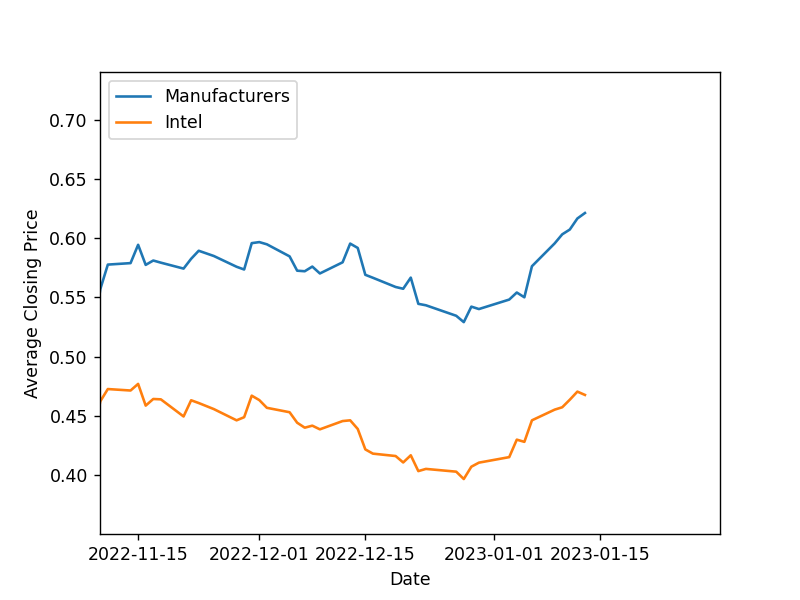

In [157]:
plt.figure()
plt.plot(average_manus, label = 'Manufacturers')
plt.plot(average_intel, label = 'Intel')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend(loc='upper left')
# plt.title(f'Correlation : {np.corrcoef(average_closes, average_intel)[0][1].round(2)}')
plt.show()

In [133]:
delta = timedelta(days=365)

start_date = date(1981, 1, 1)
end_date_move = start_date + delta
end_date = date.today() - delta
values, dates = [], []
while end_date_move <= end_date:
    values.append(np.corrcoef(average_manus[start_date.strftime("%Y-%m-%d"):end_date_move.strftime("%Y-%m-%d")], average_intel[start_date.strftime("%Y-%m-%d"):end_date_move.strftime("%Y-%m-%d")])[0][1])
    dates.append(start_date.year)
    start_date += delta
    end_date_move += delta

In [134]:
print(values, len(values))
print(dates, len(dates))

[0.8937728791420344, 0.830876563819955, 0.6646985325036693, 0.8529998771406969, 0.6875253587468002, 0.815279685137342, 0.9323549408087418, 0.9011873600685727, 0.5006370494725213, 0.7939179035102633, 0.8315115068018164, 0.8181173595274672, 0.6902002502825876, 0.38705375532709935, 0.6716907742292071, -0.22780306430434227, 0.8839862653013051, 0.24491890723646026, 0.8373508963741861, 0.6647290111952966, 0.6310023268362579, 0.9397998161577348, 0.9620691693198422, 0.9190315010436022, 0.4572915696806267, -0.052966410840640826, -0.1304808560602092, 0.6831194001777551, 0.9456181787932025, 0.6823418114575712, -0.2754994577757174, -0.05215524343135245, 0.759904926335157, 0.8391847704144032, 0.3787063551174539, 0.8892401052391878, 0.8356570713423601, 0.29928593587046676, 0.6841982358360366, -0.3565829389649142, -0.26639122228853596] 41
[1981, 1982, 1983, 1984, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2

<IPython.core.display.Javascript object>


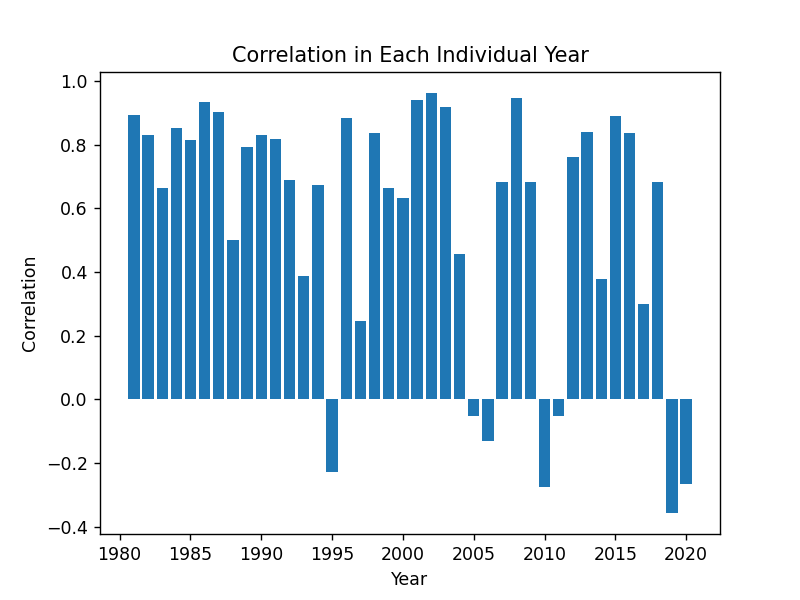

In [138]:
plt.figure()
plt.bar(dates, values)
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Correlation in Each Individual Year')
plt.show()

In [117]:
delta = timedelta(days=31)

start_date = date(1980, 3, 17)
end_date_move = start_date + delta
end_date = date.today() - delta
values, dates = [], []
while end_date_move <= end_date:
    values.append(np.corrcoef(average_manus[start_date.strftime("%Y-%m-%d"):end_date_move.strftime("%Y-%m-%d")], average_intel[start_date.strftime("%Y-%m-%d"):end_date_move.strftime("%Y-%m-%d")])[0][1])
    dates.append(end_date_move)
    end_date_move += delta

<IPython.core.display.Javascript object>


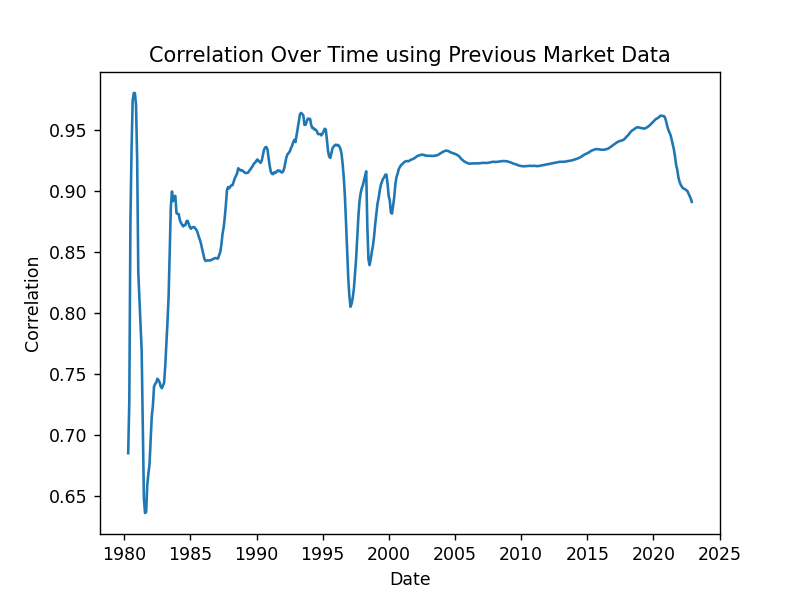

In [122]:
plt.figure()
plt.plot(pd.Series(values, index = dates))
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.title('Correlation Over Time using Previous Market Data')
plt.show()

In [70]:
intel_hist = intel.history(period = 'max')
shin_etsu_hist = shin_etsu.history(period = 'max')
spy_hist = spy.history(period = 'max')

In [71]:
start_date = '2020-01-01'
end_date = '2022-12-31'

intel_spec = intel_hist.loc[start_date:end_date]['Close']
shin_etsu_spec = shin_etsu_hist[start_date:end_date]['Close']
spy_spec = spy_hist[start_date:end_date]['Close']

# intel_spec = intel_hist['Close']
# shin_etsu_spec = shin_etsu_hist['Close']
# spy_spec = spy_hist['Close']

In [83]:
print(np.corrcoef(intel_spec, shin_etsu_spec))
# print(np.corrcoef(intel_spec, spy_spec))
# print(np.corrcoef(shin_etsu_spec, spy_spec))
# print(np.corrcoef(average_closes, intel_hist['Close'].apply(lambda x: x / intel_hist['Close'].max())))

[[1.         0.40889028]
 [0.40889028 1.        ]]


<IPython.core.display.Javascript object>


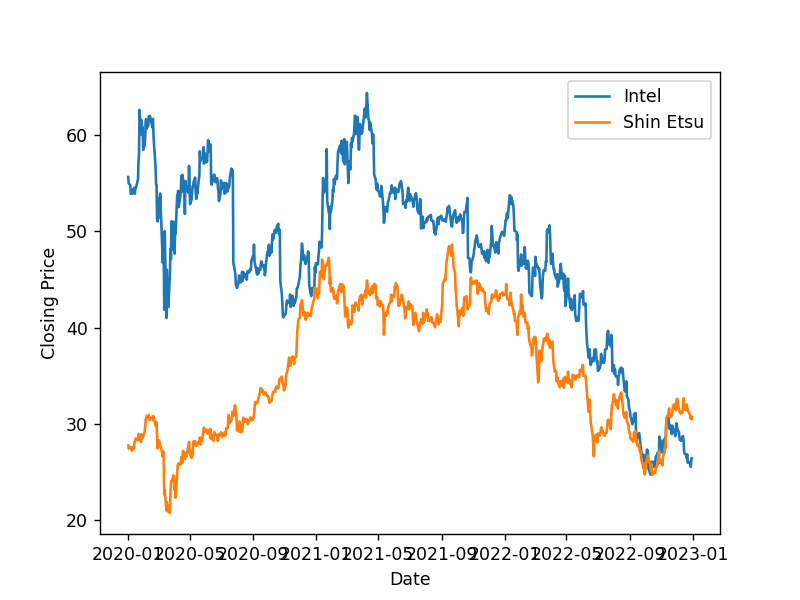

In [121]:
plt.figure()
plt.plot(intel_spec, label='Intel')
plt.plot(shin_etsu_spec, label='Shin Etsu')
# plt.plot(spy_spec, label='S&P 500')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()